<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/4%20Support%20Vector%20Machines/SVMwithOpenCVonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM with OpenCV on MNIST Dataset

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 0. Define functions to show data

In [2]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

## 1. Load MNIST Dataset

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


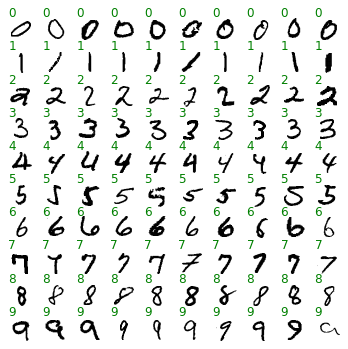

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
show_random_digits(X_train, y_train, 10, 10)

## 2. Pre-processing

In [4]:
w, h = X_train[0,:,:].shape
X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
X_test  = X_test.reshape(  X_test.shape[0], w * h).astype(np.float32)
y_train = np.uint(y_train)
y_test  = np.uint(y_test)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)


## 3. Build, Train and Run KNN

In [5]:
print("Training SVM, it could take about one or two minutes...")
print("start time =", datetime.now().time())
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
predict = svm.predict(X_test)
print("end time =", datetime.now().time())

Training SVM, it could take about one or two minutes...
start time = 20:02:43.855770
end time = 20:03:31.682878


## 4. Post-processing

Format the results to the same shape of y_test

In [6]:
results = np.uint8(predict[1])
results = np.hstack(results)
print("results:", results.shape)
print("y_test:", y_test.shape)

results: (10000,)
y_test: (10000,)


Reshape X_test to original shape of (28 x 28)

In [7]:
X_test = X_test.reshape(X_test.shape[0], w, h)

## 5. Evaluation

In [8]:
print("Accuracy Score:", accuracy_score(y_test, results))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, results))
print("\nClassification Report:\n", classification_report(y_test, results))

Accuracy Score: 0.6697

Confusion Matrix:
 [[907   0  24  10   2  22  11   1   3   0]
 [  0 743  10   3   0   0   7   0 372   0]
 [ 31  92 624  68  31  11  56  16  99   4]
 [ 11  16  57 632   1  99   4  18 165   7]
 [ 10  10   2   8 782  10  19  34  28  79]
 [ 24  14  10 251  15 467  26   6  73   6]
 [ 23   1  30  21  81  74 726   0   2   0]
 [  4  31  15  31   9   2   1 753  77 105]
 [ 18  53  87  91  11  91  20   5 594   4]
 [  7  24   4  52 140  14   0 192 107 469]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       980
           1       0.76      0.65      0.70      1135
           2       0.72      0.60      0.66      1032
           3       0.54      0.63      0.58      1010
           4       0.73      0.80      0.76       982
           5       0.59      0.52      0.56       892
           6       0.83      0.76      0.79       958
           7       0.73      0.73      0.73      1028
           8  

## 6. (Optional) Show Results

The true label is shown in green, and the predicted value is shown within [] in red.


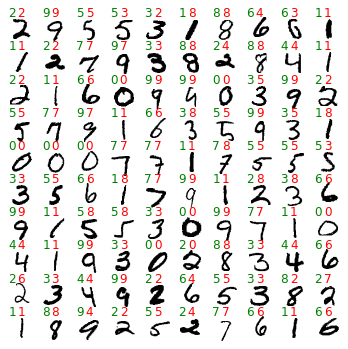

In [9]:
show_random_result(X_test , y_test, 10, 10, results)

Show the erroneously predicted digits randomly

y_test(error): (3303,)
results(error): (3303,)
X_test(error): (3303, 28, 28)
The true label is shown in green, and the predicted value is shown within [] in red.


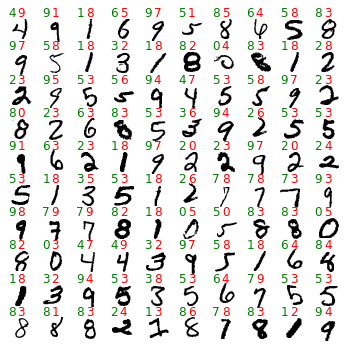

In [10]:
pred_err = np.where(y_test != results)
print("y_test(error):", y_test[pred_err].shape)
print("results(error):", results[pred_err].shape)
print("X_test(error):", X_test[pred_err,:,:][0].shape)
show_random_result(X_test[pred_err,:,:][0] , y_test[pred_err], 10, 10, results[pred_err])